In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [46]:
df =pd.read_csv(r"D:\DBDA\Adavance Stats\pandas\tips.csv")

df2=df.copy()

In [47]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [48]:
df2['sex']=df['sex'].map({'Male':1,'Female':0})
df2['smoker']=df['smoker'].map({'Yes':1,'No':0})
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3
240,27.18,2.00,0,1,Sat,Dinner,2
241,22.67,2.00,1,1,Sat,Dinner,2
242,17.82,1.75,1,0,Sat,Dinner,2


In [49]:
X= df2[['total_bill','smoker','sex']]
y=df2['tip']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=100)



In [51]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [52]:
# intercept and coefficient
print("MLR intercept",mlr.intercept_)
print(" MLR Coeff ",mlr.coef_)

MLR intercept 1.0399654681401007
 MLR Coeff  [ 0.09173219 -0.00190105  0.10275381]


In [53]:
#prediction of test set
y_pred_mlr =mlr.predict(X_test)

#predicted values
print("Prediction for the test set :{}".format(y_pred_mlr))

Prediction for the test set :[2.98470159 5.57063195 2.85527904 1.70502383 4.63496364 2.30404876
 2.43339115 3.1149613  2.28570233 4.1386261  2.40954078 2.82600491
 3.40942162 4.23499755 3.04065823 5.30087291 2.51771835 2.24435643
 2.67097751 2.58009624 3.18192579 4.92116806 3.80570467 2.72601682
 3.77358465 3.02408002 2.36917862 2.26911037 2.20856712 2.20673248
 2.75628845 1.85082535 3.31493747 3.34330803 2.42145221 3.64327229
 5.57613588 2.64252678 2.37186417 2.74436326 2.42696989 2.08387776
 2.95526713 4.32672973 2.10682456 3.62216013 3.03698894 3.89828777
 2.15170692 2.84250295 2.42146596 2.62784963 3.3919925  1.92788039
 3.76167322 2.13067493 4.75880209 1.98755896 2.9305796  2.48658206
 4.2331629  5.56145873 2.24716105 3.33327015 4.27444239 3.12229987
 2.44890545 2.77646953 2.00950828 2.01691326 2.5911041  2.5929914
 2.18478316 2.34716289]


In [54]:
# actual values and predicted values 

mlr_diff = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred_mlr})

print(mlr_diff)

     Actual Value  Predicted value
65           3.15         2.984702
59           6.73         5.570632
191          4.19         2.855279
111          1.00         1.705024
112          4.00         4.634964
..            ...              ...
117          1.50         2.016913
171          3.16         2.591104
37           3.07         2.592991
124          2.52         2.184783
151          2.00         2.347163

[74 rows x 2 columns]


In [55]:
from sklearn import metrics
meanAbErr =metrics.mean_absolute_error(y_test,y_pred_mlr)

meanSqErr =metrics.mean_squared_error(y_test,y_pred_mlr)

rootMeanSqErr =np.sqrt(metrics.mean_squared_error(y_test,y_pred_mlr))

print('R Squared: {:.2f}'.format(mlr.score(X,y)*100))
print("Mean Absolute Error ",meanAbErr)
print("Mean Squared Error ",meanSqErr)
print("Root Mean Squared Error ",rootMeanSqErr)

R Squared: 44.51
Mean Absolute Error  0.7504401360529248
Mean Squared Error  1.072010083950527
Root Mean Squared Error  1.0353791981445866


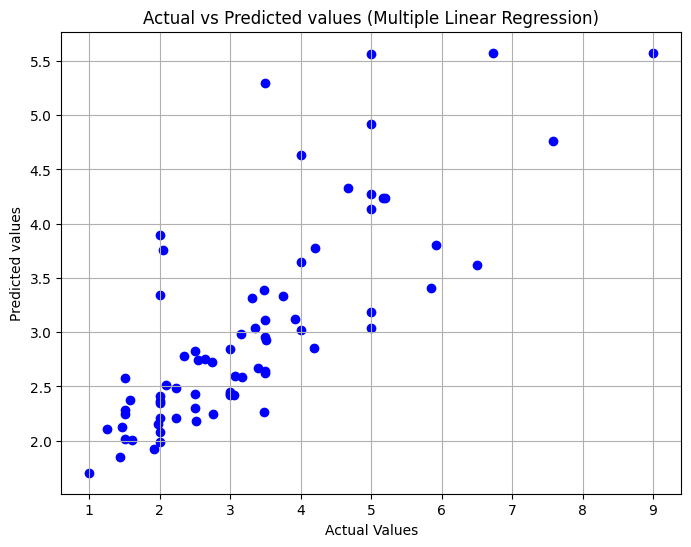

In [56]:
# plotting actualvs predicted values

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_mlr,color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values (Multiple Linear Regression)")
plt.grid(True)
plt.show()

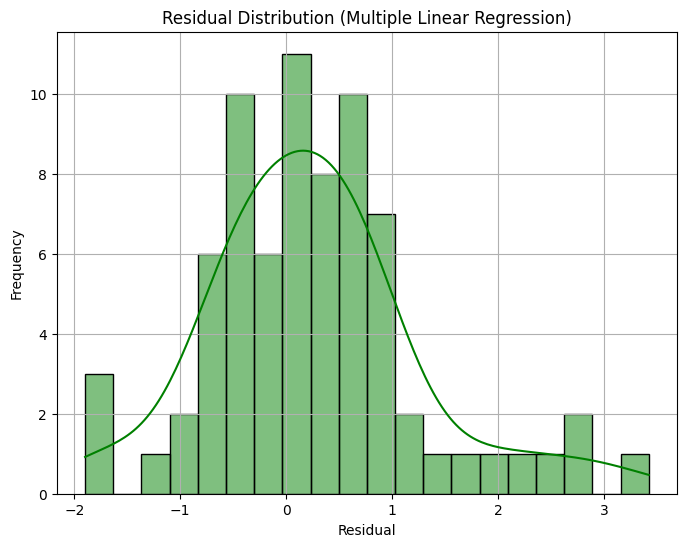

In [57]:
residuals=y_test -y_pred_mlr
plt.figure(figsize=(8,6))
sns.histplot(residuals,bins=20,kde=True,color='green')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Multiple Linear Regression)")
plt.grid(True)
plt.show()